# Introduction
This report is a part of FracTracker's Summer 2024 Internship Project. In this report, we identify labeling issues found in the the title fields of FracTracker's Flickr photos. Implementing a consistent naming convention is an important first step towards automating the process of populating the FracTracker GIS map with relational photo data. We will highlight the attributes of the title field and key insights along the way.

### Data Source
The data used in this report is scraped from Fractracker's Flickr page found [here](https://www.flickr.com/photos/fractracker/albums/). The photos were captured and named by members of the FracTracker organization. These photos contain imagery of fracking sites and sites related to the fracking process. Most of the photos are located in the United States. These photos were taken in support of FracTracker's initiative to document environmental, health-related, and other impacts of fracking. This report is based on data scraped in July 2024.

In [67]:
# importing packages 
import re
import pandas as pd
import gc # releasing heavy dataframes
import seaborn as sns
import matplotlib.pyplot as plt

In [68]:
# importing our data
df = pd.read_csv('data/tidied_threaded_data_pull.csv')

In [69]:
shape = df.shape # get its dimensions
print("This data set has", shape[0], "photos and", shape[1], "attributes per photo.")
print("The attributes in this data set are", list(df.columns))

This data set has 2718 photos and 8 attributes per photo.
The attributes in this data set are ['PhotoID', 'AlbumTitle', 'Title', 'Date_taken', 'Description', 'URL', 'Latitude', 'Longitude']


# The Title Field
### Let's take a peak at what's in the title column...

In [70]:
s = df.loc[0,'Title'] # grab the first cell's contents of the Title column
print("An example from the title column:", s)
print("The attributes in this title column:", s.split('_')) # demonstrate the split function

An example from the title column: TAuch_FracSand-Mine-WisconsinProppants-Hixton_WI_June2019
The attributes in this title column: ['TAuch', 'FracSand-Mine-WisconsinProppants-Hixton', 'WI', 'June2019']


In this report, we clean the title field. The title field scraped from each FracTracker Flickr image contains the name of the photographer, the topic of the album where the photo is located on Flickr, the type of fracking-related site where the photo was taken, the name of the company that owns the site, the county and state where the site is located, the name of the partner company who assisted with capturing the photo, and the date that the photo was taken.  

### Issues with the Title Field
As far as we know, there is no way of extracting all the information in a _single pass algorithm_. We attempted to use the RegEx library to separate the various attributes, but many of the title entries do not follow the intended structure (listed below). 

### Title Field Structure
The structure of the title field is explained under each photo's listed title as `Photographer_topic-sitespecific-siteowner-county-state_partneraffiliation_date(version)`. The structure we use in this report to separate out the important attributes is as follows: `PhotoAttribution _ Type-of-Hazardous-Site _ CommercialName _ CountyState _ MonthYear`

# Cleaning the Title Field
In this section of the report, we are separating out the different attributes found in the title column.
### Creating `Title_photo_attr` Column
Let's create a new column that contains the first part of the title: the photo attribution

In [71]:
# Create a new column in the dataframe that contains the first part of the Title column
df['Title_photo_attr'] = df.Title.apply(lambda x : x.split('_')[0])
df[['Title', 'Title_photo_attr']].head()

,Title,Title_photo_attr
0,TAuch_FracSand-Mine-WisconsinProppants-Hixton_...,TAuch
1,TAuch_FracSand-Mine-USSilica-Ottawa_IL_LightHa...,TAuch
2,TAuch_FracSand-Mine-USSilica-Ottawa_IL_LightHa...,TAuch
3,TAuch_FracSand-Mine-Unimin-NorthUtica_IL_Light...,TAuch
4,TAuch_FracSand-Mine-Unimin-NorthUtica_IL_June2016,TAuch


# Data Analysis
graham notes!!
- histogram of photo upload and taken date. Date on the X axis and photo count. Probably a large number of classes
- bar/pie chart of states by photo count
- bar/pie of photo attribution
- bar/pie of 'mission' by photo count
- how many photos taken by LightHawk Aviation company excluding the year, what month are the photos taken in

### `Title_photo_attr`: Who took photos?
Let's see what going on in this column

In [72]:
all(df.loc[:,'Title_photo_attr']=='TAuch') # some not TED 

False

In [73]:
photo_attribution = df['Title_photo_attr'].unique()
print('Unique photo contibutors:', photo_attribution)
print('Number of unique photo contibutors:', len(photo_attribution))

# photo_attribution = set(photographer for photographer in df['Title_photo_attr'])
# photo_attribution, len(photo_attribution)

Unique photo contibutors: ['TAuch' 'LDaul' 'HBoschen' 'RZarwell' 'MWhipple' 'BLenker' 'SRubright'
 'BHughes' 'EJackson' 'SSmith' 'KEdelstein' 'MKelso' 'RJohnson' 'DMartin'
 'DSC' 'DJI']
Number of unique photo contibutors: 16


In [74]:
df['Title_photo_attr'].value_counts()

TAuch         2613
SSmith          24
BLenker         14
MKelso          14
RJohnson        14
EJackson        13
KEdelstein       7
DMartin          4
SRubright        3
BHughes          3
LDaul            2
HBoschen         2
DSC              2
RZarwell         1
MWhipple         1
DJI              1
Name: Title_photo_attr, dtype: int64

In [75]:
print('Ted contributed', sum(df['Title_photo_attr']=='TAuch'), 'photos which make up', round(sum(df['Title_photo_attr']=='TAuch')/shape[0]*100, 2), '% of the dataset.') # how many are TED ?

Ted contributed 2613 photos which make up 96.14 % of the dataset.


[Text(0, 0, '2613'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '14'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '13'),
 Text(0, 0, '24'),
 Text(0, 0, '7'),
 Text(0, 0, '14'),
 Text(0, 0, '14'),
 Text(0, 0, '4'),
 Text(0, 0, '2'),
 Text(0, 0, '1')]

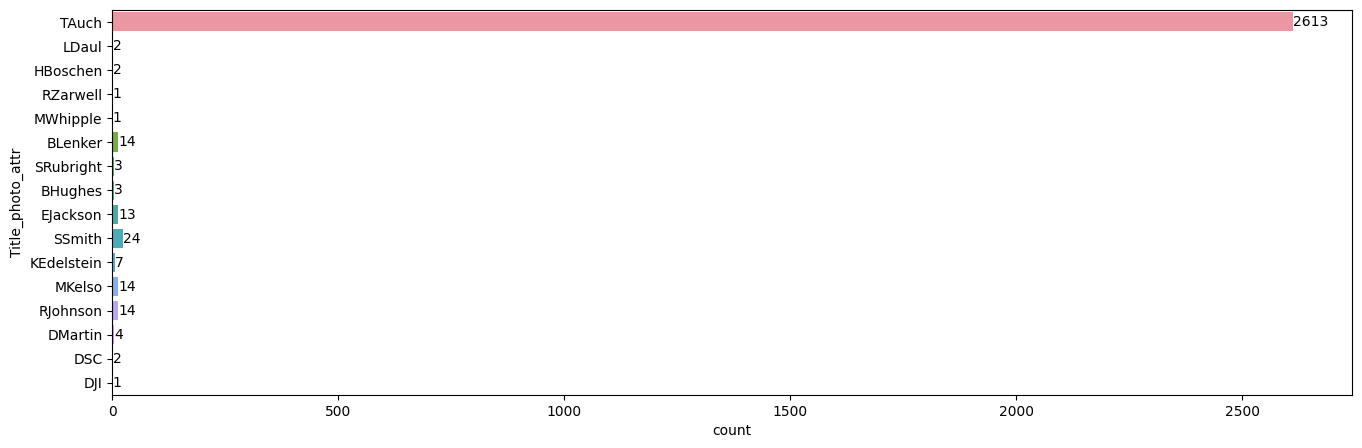

In [76]:
plt.figure(figsize=(16, 5))
ax = sns.countplot(data = df, y = df['Title_photo_attr'])
ax.bar_label(ax.containers[0])